In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
 
df = pd.read_csv("data/tunnel.csv",parse_dates=["Day"])
df = df.set_index("Day")
df['Time'] = np.arange(len(df.index))
print(df.shape)
df.head()

(747, 2)


,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


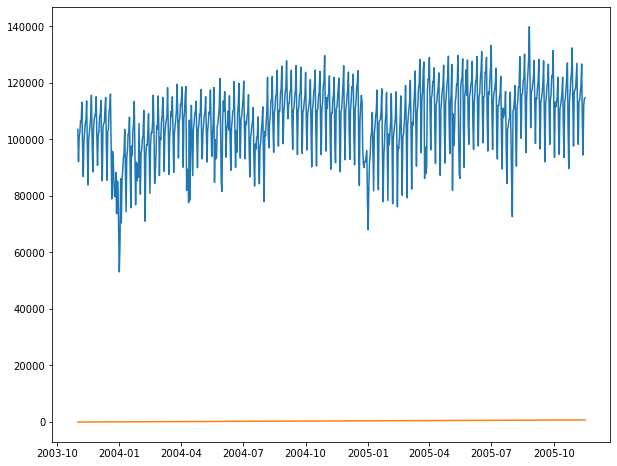

In [4]:
pl.figure(figsize=(10,8))

pl.plot(df)

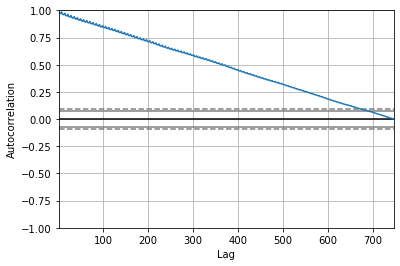

In [5]:
pd.plotting.autocorrelation_plot(df)

In [7]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 99 kB/s             
     |████████████████████████████████| 233 kB 9.0 MB/s            
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
model = ARIMA(df['NumVehicles'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

/home/riccardo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/riccardo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/riccardo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            NumVehicles   No. Observations:                  747
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7903.404
Date:                Sat, 05 Feb 2022   AIC                          15818.808
Time:                        21:17:01   BIC                          15846.496
Sample:                    11-01-2003   HQIC                         15829.479
                         - 11-16-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3701      0.025    -14.584      0.000      -0.420      -0.320
ar.L2         -0.5140      0.024    -21.065      0.000      -0.562      -0.466
ar.L3         -0.4037      0.031    -13.034      0.0

In [23]:
df['forecast']=model_fit.predict(start=747,end=749,dynamic=True)

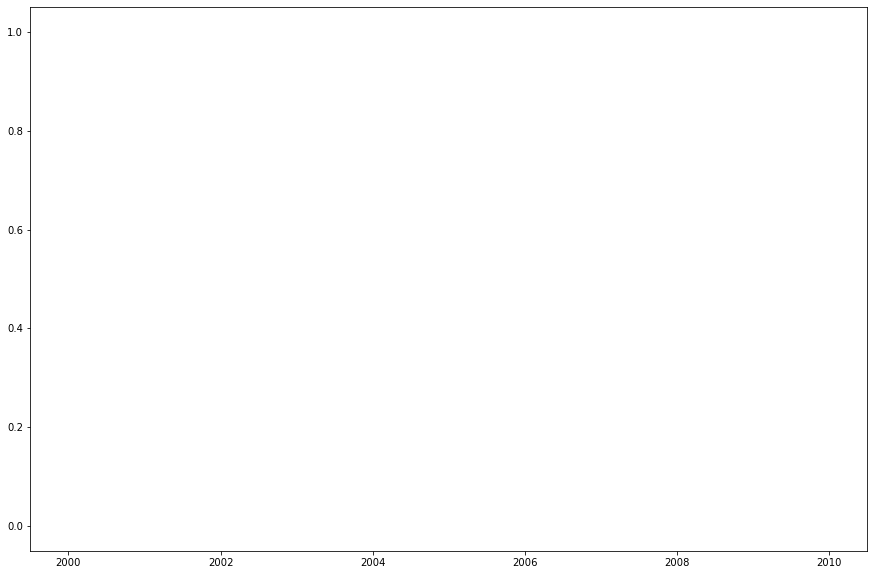

In [25]:
pl.figure(figsize=(15,10))

pl.plot(df['forecast'])
#pl.plot(df['NumVehicles'])

In [37]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['NumVehicles'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=745,end=750,dynamic=True)

/home/riccardo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/riccardo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(740, 780)

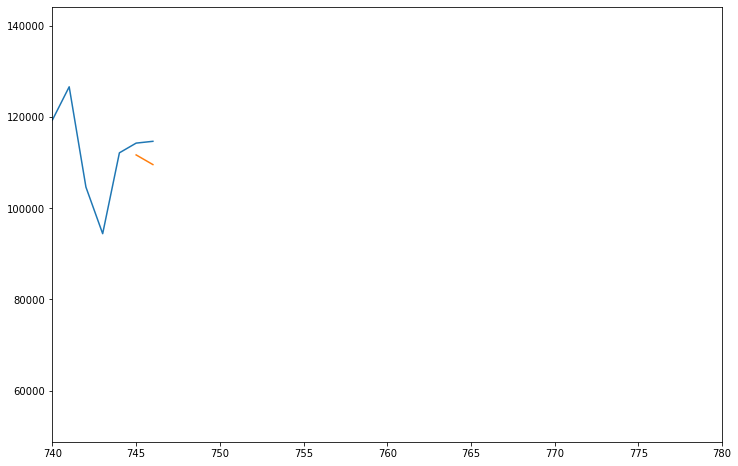

In [38]:
pl.figure(figsize=(12,8))
pl.plot(df['Time'],df['NumVehicles'])
pl.plot(df['Time'],df['forecast'])
pl.xlim(740,780)

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])